In [1]:
from candex import candex

cndx = candex()  # initialize candex object
cndx.name_of_case              = 'capitals_north_america'
cndx.temporary_candex_folder   = '../temporary/'
cndx.name_of_target_shp        = '../data/target_shapefiles/Capitals_point.shp'
cndx.name_of_nc_files          = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
cndx.name_of_var_name          = ['airtemp']
cndx.name_of_var_lon           = 'longitude' 
cndx.name_of_var_lat           = 'latitude'
cndx.name_of_var_time          = 'time'
cndx.name_of_nc_output_folder  = '../output/'
cndx.format_list               =  ['f4']
cndx.fill_value_list           = ['-9999.00']
#cndx.name_of_remap_file        = '../temporary/capitals_north_america_remapping.csv'

# execute candex
cndx.run_candex()


candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself


/Users/shg096/Desktop/candex_newgen/candex/candex.py:111: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target
/Users/shg096/Desktop/candex_newgen/candex/candex.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # centroid lon from target


candex detects point(s) as geometry of target shapefile and will apply small buffer to them
candex will save standard shapefile for candex claculation as:
../temporary/capitals_north_america_target_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
candex detects that the longitude varibales has dimensions of:
['longitude']
candex detects that the latitude varibales has dimensions of:
['latitude']
candex detects case 1 - regular lat/lon
candex is creating the shapefile from the netCDF file and saving it here:
../temporary/capitals_north_america_source_shapefile.shp
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended
candex saved the expanded shapefile at:
../temporary/capitals_north_america_source_shapefile_expanded.shp


/Users/shg096/Desktop/candex_newgen/candex/candex.py:541: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:545: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:640: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex_newgen/candex/candex.py:644: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.Ge

Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/capitals_north_america_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-01-23 19:52:29.759717
Ended   at date and time 2021-01-23 19:52:29.867462
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/capitals_north_america_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-01-23 19:52:29.873184
Ended   at date and time 2021-01-23 19:52:29.968329
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790103.nc to ../output/capitals_north_america_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-01-23 19:52:29.973769
Ended   at date and time 2021-01-23 19:52:30.066184


            S_1_name  ID_t      lat_t      lon_t           AS1  IDS1  \
0      Port-of-Spain    13  10.651997 -61.517031  2.000000e-10    13   
1             Roseau    23  15.301016 -61.387013  2.000000e-10    23   
2         Bridgetown    27  13.102003 -59.616527  2.000000e-10    27   
3          Kingstown    29  13.148279 -61.212062  2.000000e-10    29   
4           Castries    30  14.001973 -61.000008  2.000000e-10    30   
5         Basseterre    31  17.302030 -62.717009  2.000000e-10    31   
6     Saint George's    33  12.052633 -61.741643  2.000000e-10    33   
7       Saint John's    35  17.118037 -61.850034  2.000000e-10    35   
8        Tegucigalpa    45  14.103991 -87.219475  2.000000e-10    45   
9         Georgetown    46   6.801974 -58.167029  2.000000e-10    46   
10    Port-au-Prince    48  18.542970 -72.337980  2.000000e-10    48   
11        Paramaribo    50   5.835030 -55.167031  2.000000e-10    50   
12           Managua    54  12.154962 -86.270438  2.000000e-10  

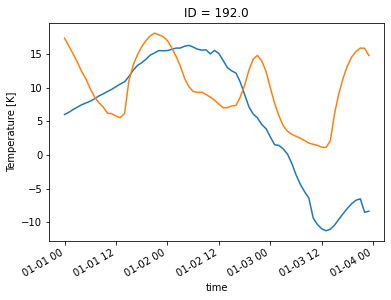

In [3]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
shp = gpd.read_file('../temporary/capitals_north_america_intersected_shapefile.shp')
print(shp)
ds = xr.merge([xr.open_dataset(f) for f in sorted(glob.glob('../output/capitals_north_america_remapped_*.nc'))])
print(ds)
print(ds.ID)
ds.airtemp [:,:] = ds.airtemp[:,:] - 273;

WashingtonDC = ds.sel(ID=187, method = 'nearest') # ID_t, the target ID for Washington DC is 187
print(WashingtonDC)
WashingtonDC.airtemp.plot()

MexicoCity = ds.sel(ID=192, method = 'nearest') # ID_t, the target ID for Washington DC is 192
print(MexicoCity)
MexicoCity.airtemp.plot()


In [40]:
shp = gpd.read_file('../data/target_shapefiles/Capitals_point.shp')
print(shp)

             name                     geometry
0    Vatican City    POINT (12.45339 41.90328)
1      San Marino    POINT (12.44177 43.93610)
2           Vaduz     POINT (9.51667 47.13372)
3      Luxembourg     POINT (6.13000 49.61166)
4         Palikir    POINT (158.14997 6.91664)
..            ...                          ...
197         Cairo    POINT (31.24802 30.05191)
198         Tokyo   POINT (139.74946 35.68696)
199         Paris     POINT (2.33139 48.86864)
200      Santiago  POINT (-70.66899 -33.44807)
201     Singapore    POINT (103.85387 1.29498)

[202 rows x 2 columns]


In [21]:
shp = gpd.read_file ('../data/target_shapefiles/Capitals_point.shp')
shp['ID'] = 1
shp = shp.dissolve(by = 'ID')
print(shp)
shp.to_file('../data/target_shapefiles/Capitals_multipoints.shp')

                                             geometry          name
ID                                                                 
1   MULTIPOINT (-175.22056 -21.13851, -171.73864 -...  Vatican City
